In [12]:
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, mean_squared_error

In [2]:
height = 300
width = 300

In [3]:
# Define directories for training and validation data.
train_dir = "C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(500)/Training"
validation_dir = "C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(500)/Validation"

In [4]:
batch_size = 8

In [5]:
# Data augmentation for training images.
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                   horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height, width),
                                                    batch_size=batch_size, class_mode='binary')

Found 44 images belonging to 2 classes.


In [6]:
# Data augmentation for validation images.
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                        horizontal_flip=True, vertical_flip=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                              batch_size=batch_size, class_mode='binary')

Found 32 images belonging to 2 classes.


In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))


In [8]:
# Add custom top layers for classification.
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [9]:
# Combine base model with custom top layers
finetune_model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Compile the model
finetune_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [14]:

# Checkpoint and early stopping
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max', restore_best_weights=True)


In [16]:
history = finetune_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[]  # test with no callbacks
)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5897 - loss: 33.6314 - val_accuracy: 0.8125 - val_loss: 18.3402
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9292 - loss: 7.8634 - val_accuracy: 0.6562 - val_loss: 16.9594
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7858 - loss: 20.0154 - val_accuracy: 0.5938 - val_loss: 23.9384
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9206 - loss: 10.0019 - val_accuracy: 0.6562 - val_loss: 39.8971
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8345 - loss: 11.2608 - val_accuracy: 0.7812 - val_loss: 14.1904
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8890 - loss: 4.7306 - val_accuracy: 0.6875 - val_loss: 26.7552
Epoch 12/100


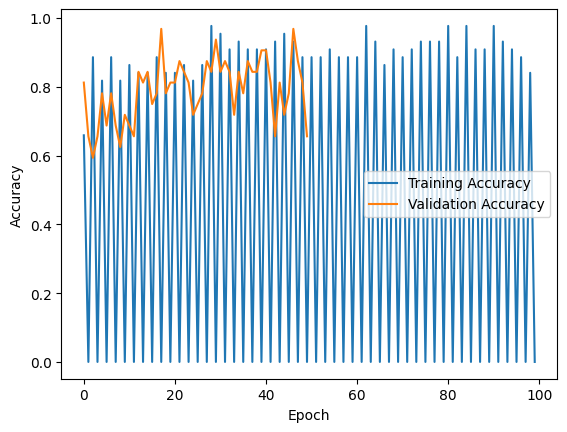

In [17]:
# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


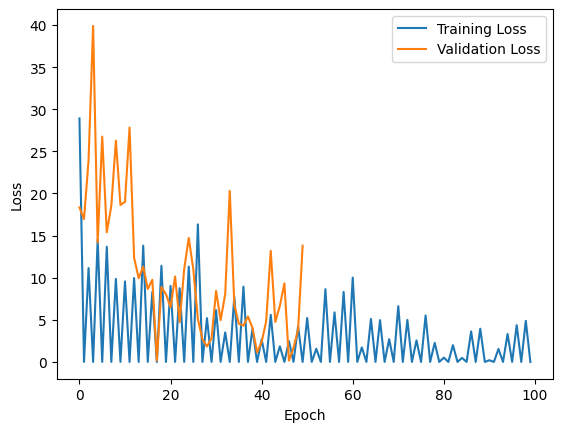

In [18]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Testing the model
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Real"
    else:
        return "Fake"

NameError: name 'finetune_model' is not defined

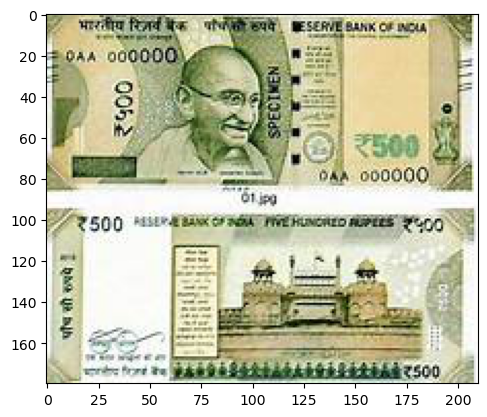

In [20]:
# Specify the image path
test_img_path ="C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(500)/Testing/Fake/fake 2.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


In [6]:
# Specify the image path
test_img_path ="C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(500)/Testing/Real/Real 1.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

NameError: name 'image' is not defined

In [8]:
# Calculate overall accuracy of the model on the validation set.
overall_accuracy =finetune_model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)

# Print overall accuracy.
print("Validation Accuracy:", overall_accuracy[1])

NameError: name 'finetune_model' is not defined

Found 31 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


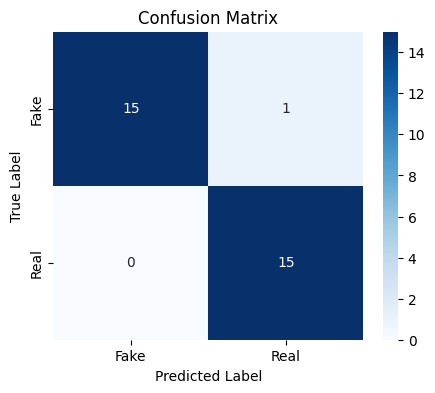

In [28]:
# Predict the whole validation set
validation_generator_predict = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                                      batch_size=batch_size, class_mode='binary', shuffle=False)
validation_generator_predict.reset()
predictions = finetune_model.predict(validation_generator_predict, steps=len(validation_generator_predict), verbose=1)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = validation_generator_predict.classes

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()